# Lab 5

Teryt - Krajowy Rejestr Urzędowy Podziału Terytorialnego Kraju – rejestr urzędowy podziału terytorialnego Polski, prowadzony przez Główny Urząd Statystyczny. 

Identyfikatory rejestru TERYT stanowią obowiązujący standard identyfikacji terytorialnej dla organów prowadzących urzędowe rejestry i systemy informacyjne administracji publicznej i stosowane w innych ewidencjach, rejestrach i systemach odnoszących się do jednostek terytorialnych, umożliwiają integrację danych gromadzonych w tych systemach. Mogą być stosowane w zakresie pełnym lub częściowym, w zależności od potrzeb danego rejestru lub systemu.

Jednocześnie umożliwiają opracowywanie i prezentowanie zjawisk społeczno-ekonomicznych w przekrojach o różnym stopniu szczegółowości, tj.:
*   województw, powiatów, gmin,
*   dzielnic i delegatur w gminach miejskich,
*   rejonów statystycznych i obwodów spisowych,
*   obrębów stosowanych w ewidencji gruntów i budynków,
*   miejscowości i ulic,
*   a także w podziale na miasta i wsie.

In [ ]:
import pandas as pd
import numpy as np

wczytujemy dane z dwóch plików Excela


In [ ]:
cenym2 = pd.read_excel(io="powiaty-nieruch-cenam2.xlsx", sheet_name=1)
wyn = pd.read_excel(io="powiaty-wynagrodzenie.xlsx", sheet_name=1)
cenym2.head()

,Kod,Nazwa,Rodzaje transakcji,Lokale mieszkalne,Rok,Wartosc,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,ogółem,2017,2550,zł,
1,201000,Powiat bolesławiecki,ogółem,ogółem,2018,2677,zł,
2,201000,Powiat bolesławiecki,ogółem,ogółem,2019,3292,zł,
3,201000,Powiat bolesławiecki,ogółem,ogółem,2020,3854,zł,
4,201000,Powiat bolesławiecki,ogółem,1 izbowe,2017,3052,zł,


zmieniamy nazwy kolumn z wykorzystaniem pandas

In [ ]:
cenym2.rename(columns = {"Kod": "kod", 
                         "Nazwa": "powiat", 
                         "Rok": "rok", 
                         "Lokale mieszkalne": "izby", 
                         "Wartosc":"cenam2"})
cenym2.head(3)

,Kod,Nazwa,Rodzaje transakcji,Lokale mieszkalne,Rok,Wartosc,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,ogółem,2017,2550,zł,
1,201000,Powiat bolesławiecki,ogółem,ogółem,2018,2677,zł,
2,201000,Powiat bolesławiecki,ogółem,ogółem,2019,3292,zł,


In [ ]:
cenym2.rename(columns = {"Kod": "kod", 
                         "Nazwa": "powiat", 
                         "Rok": "rok", 
                         "Lokale mieszkalne": "izby", 
                         "Wartosc":"cenam2",
                         "Rodzaje transakcji" : "trans"}, inplace=True) ##inplace=True na stałe zmienił nazwy kolumn
cenym2.head(3)

,kod,powiat,trans,izby,rok,cenam2,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,ogółem,2017,2550,zł,
1,201000,Powiat bolesławiecki,ogółem,ogółem,2018,2677,zł,
2,201000,Powiat bolesławiecki,ogółem,ogółem,2019,3292,zł,


In [ ]:
wyn.rename(columns = {"Kod": "kod", 
                         "Nazwa": "powiat", 
                         "Rok": "rok", 
                         "Wartosc": "wynagrodzenie"}, inplace=True) 
wyn.head(3)

,kod,powiat,Wyszczególnienie,rok,wynagrodzenie,Jednostka miary,Atrybut
0,201000,Powiat bolesławiecki,ogółem,2017,3901.94,zł,
1,201000,Powiat bolesławiecki,ogółem,2018,4214.66,zł,
2,201000,Powiat bolesławiecki,ogółem,2019,4545.34,zł,


sprawdzamy jakiego typu są kolumny w zbiorze danych a następnie czyścimy kod powiatu

In [ ]:
wyn.dtypes

kod                   int64
powiat               object
Wyszczególnienie     object
rok                   int64
wynagrodzenie       float64
Jednostka miary      object
Atrybut              object
dtype: object

zmieniamy typ kolumny za pomocą astype() 

In [ ]:
wyn["kod"] = wyn["kod"].astype(str)
wyn.dtypes

kod                  object
powiat               object
Wyszczególnienie     object
rok                   int64
wynagrodzenie       float64
Jednostka miary      object
Atrybut              object
dtype: object

In [ ]:
wyn["kod"] = wyn["kod"].str.pad(width=7, side="left", fillchar="0")

In [ ]:
cenym2["kod"] = cenym2["kod"].astype(str).str.pad(width=7, side="left", fillchar="0")
cenym2.head(3)

,kod,powiat,trans,izby,rok,cenam2,Jednostka miary,Atrybut
0,0201000,Powiat bolesławiecki,ogółem,ogółem,2017,2550,zł,
1,0201000,Powiat bolesławiecki,ogółem,ogółem,2018,2677,zł,
2,0201000,Powiat bolesławiecki,ogółem,ogółem,2019,3292,zł,


łączenie danych


In [ ]:
cenym2.value_counts("rok"), wyn.value_counts("rok")

(rok
 2020    3800
 2019    3800
 2018    3800
 2017    3800
 dtype: int64, rok
 2020    380
 2019    380
 2018    380
 2017    380
 dtype: int64)

In [ ]:
cenym2.value_counts("trans"), cenym2.value_counts("izby")

(trans
 sprzedaż na wolnym rynku    7600
 ogółem                      7600
 dtype: int64, izby
 ogółem                3040
 4 izbowe i większe    3040
 3 izbowe              3040
 2 izbowe              3040
 1 izbowe              3040
 dtype: int64)

ile miesięcy powinniśmy pracować aby kupić mieszkanie "ogółem" lub "2 izbowe"

In [ ]:
cenym2.query("trans=='sprzedaż na wolnym rynku' & (izby=='ogółem' | izby == '2 izbowe')")[["kod", "powiat","rok", "cenam2"]]

,kod,powiat,rok,cenam2
20,0201000,Powiat bolesławiecki,2017,2631
21,0201000,Powiat bolesławiecki,2018,2701
22,0201000,Powiat bolesławiecki,2019,3346
23,0201000,Powiat bolesławiecki,2020,3947
28,0201000,Powiat bolesławiecki,2017,2619
...,...,...,...,...
15183,3263000,Powiat m.Świnoujście,2020,8232
15188,3263000,Powiat m.Świnoujście,2017,6314
15189,3263000,Powiat m.Świnoujście,2018,6969
15190,3263000,Powiat m.Świnoujście,2019,8001


In [ ]:
wyn[["kod", "rok", "wynagrodzenie"]]

,kod,rok,wynagrodzenie
0,0201000,2017,3901.94
1,0201000,2018,4214.66
2,0201000,2019,4545.34
3,0201000,2020,4887.95
4,0202000,2017,3825.15
...,...,...,...
1515,3262000,2020,5695.84
1516,3263000,2017,4536.08
1517,3263000,2018,4779.09
1518,3263000,2019,5222.62


In [ ]:
analiza = pd.merge(
    left=cenym2.query(
        "trans=='sprzedaż na wolnym rynku' & (izby=='ogółem' | izby == '2 izbowe')")[["kod", "powiat","rok", "cenam2","izby"]],
        right = wyn[["kod", "rok","wynagrodzenie"]],
        how="left", #do lewego zbioru danych dodajemy prawy zbioru danych
        on=["kod", "rok"] #klucze po któerych zbiory danych mają być wyłączone
    )
analiza.head()

,kod,powiat,rok,cenam2,izby,wynagrodzenie
0,0201000,Powiat bolesławiecki,2017,2631,ogółem,3901.94
1,0201000,Powiat bolesławiecki,2018,2701,ogółem,4214.66
2,0201000,Powiat bolesławiecki,2019,3346,ogółem,4545.34
3,0201000,Powiat bolesławiecki,2020,3947,ogółem,4887.95
4,0201000,Powiat bolesławiecki,2017,2619,2 izbowe,3901.94


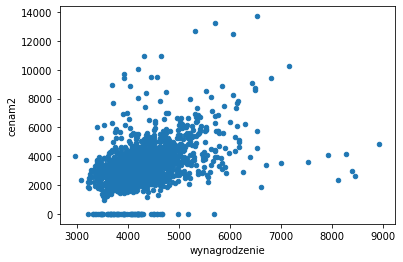

In [ ]:
analiza.query("izby=='2 izbowe'").plot.scatter(x='wynagrodzenie', y='cenam2')